In [1]:
## "Exploring Lending Home Dataset - Reza Taeb"


##  First Part: importing esential packages, loading dataset and getting familiar with dataset, 
##              initial exploratory data anlaysis, initial data wrangling 

# import essential packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime


In [2]:
# loading dataset and getting familiar with it

dataset_name = 'LH_data_scientist_intern_excercise.csv'
df = pd.read_csv(dataset_name)

# adjust output view
pd.set_option('display.width', 120)
sns.set()

# Getting familiar with dataset 

print (df.info())
print (df.head())
print (df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158800 entries, 0 to 158799
Data columns (total 11 columns):
property_id           158800 non-null int64
transaction_amount    158800 non-null int64
loan_amount           158800 non-null float64
buyer                 158800 non-null object
lender                158800 non-null object
transaction_date      158800 non-null object
property_type         158800 non-null object
property_address      94217 non-null object
seller                158800 non-null object
year_built            158800 non-null int64
sqft                  158800 non-null int64
dtypes: float64(1), int64(4), object(6)
memory usage: 13.3+ MB
None
   property_id  transaction_amount  loan_amount                               buyer         lender transaction_date  \
0     27885942              670000          0.0       SWEENEY,THOMAS R & MICHELLE H  * Undisclosed       2012-02-27   
1     26400001              260000          0.0  DOUGHERTY,HERBERT III & JENNIFER M  * Undis

/Users/rtmac/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


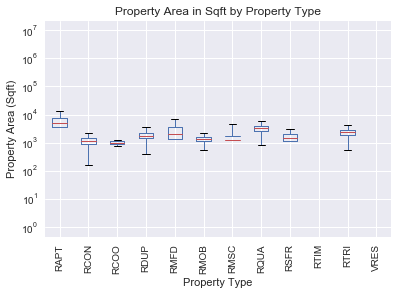

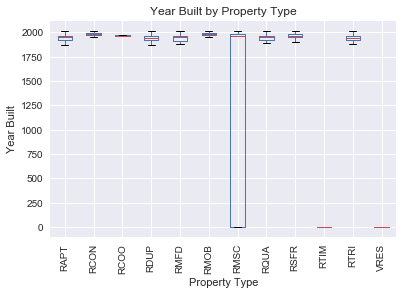

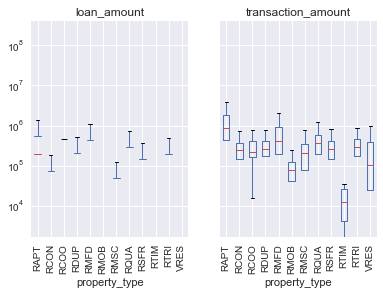

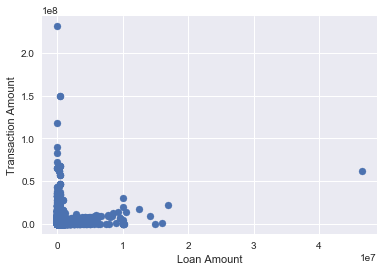

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6743 entries, 8 to 158772
Data columns (total 11 columns):
property_id           6743 non-null int64
transaction_amount    6743 non-null int64
loan_amount           6743 non-null float64
buyer                 6743 non-null object
lender                6743 non-null object
transaction_date      6743 non-null object
property_type         6743 non-null object
property_address      5426 non-null object
seller                6743 non-null object
year_built            6743 non-null int64
sqft                  6743 non-null int64
dtypes: float64(1), int64(4), object(6)
memory usage: 632.2+ KB


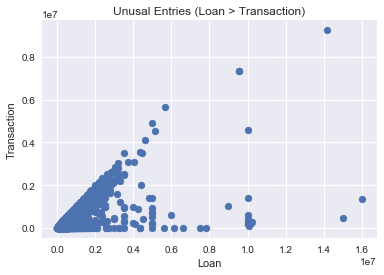

In [3]:
# Initial visulaziation to get some sense of data and mostly for recognizing missing or unusal entries 

## Previous part shows some strange information about "Property Area", "Year Built", "Loan Amount", and "Transaction"
## So it needs more exploration: 


# 1 - Checking Property Area by Property Type

df.boxplot(column='sqft', by='property_type', rot=90)
plt.yscale('log')
plt.title('Property Area in Sqft by Property Type')
plt.suptitle("")
plt.xlabel('Property Type')
plt.ylabel('Property Area (Sqft)')
plt.show()

## There are some very small (area < 50 sqft), which I assume that they are wrong value 
## but since they are just few enteries (11) , I will just remove "0" areas and leave small ones in dataset.()



# 2 - Checking Year Built 

df.boxplot(column='year_built' , by='property_type', rot=90)
plt.title('Year Built by Property Type')
plt.suptitle("")
plt.xlabel('Property Type')
plt.ylabel('Year Built')
plt.show()

## Some zero values are seen, needed to replace with NaN.



# 3 - Cheacking Loan Amount and Transaction Amount

df.boxplot(column=['loan_amount','transaction_amount'] , by='property_type', rot=90 )
plt.yscale('log')
plt.suptitle("")
plt.ylabel('Amount (Dollar)')
plt.show()

## Checking if in some cases "loan" > "Transaction" which may be unusal and need more exploration
plt.scatter(df['loan_amount'],df['transaction_amount'])
plt.xlabel('Loan Amount')
plt.ylabel('Transaction Amount')
plt.show()

# More exploration on Unusal Observations 
unusal_df = df[df['loan_amount'] > df['transaction_amount']]
unusal_df.head()
unusal_df.info()
plt.scatter(unusal_df['loan_amount'], unusal_df['transaction_amount'])
plt.xlabel('Loan')
plt.ylabel('Transaction')
plt.title('Unusal Entries (Loan > Transaction)')
plt.suptitle("")
plt.show()

## Here is the other area that we probably need to correct our current data, however since there may be some resoans
## for these observation I will keep them in dataset. 



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158800 entries, 0 to 158799
Data columns (total 11 columns):
property_id           158800 non-null int64
transaction_amount    158800 non-null int64
loan_amount           158800 non-null float64
buyer                 158800 non-null object
lender                48113 non-null object
transaction_date      158800 non-null datetime64[ns]
property_type         158800 non-null object
property_address      94217 non-null object
seller                158800 non-null object
year_built            149564 non-null float64
sqft                  152158 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(2), object(5)
memory usage: 13.3+ MB
None
   property_id  transaction_amount  loan_amount                 buyer            lender transaction_date  \
0     26222871              429000          0.0       MAMARBASHI,DINA               NaN       2012-01-03   
1     24797528               47500          0.0  RSJS INVESTMENTS LLC               

/Users/rtmac/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


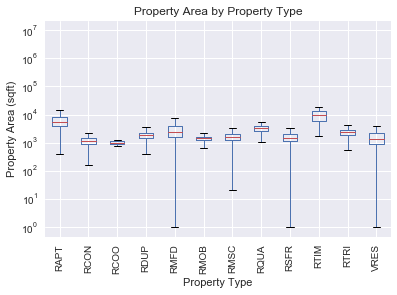

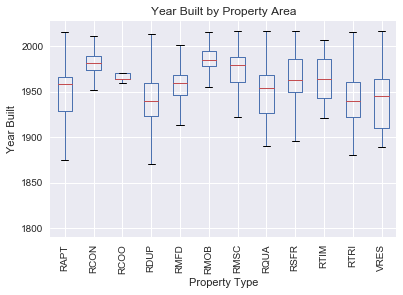

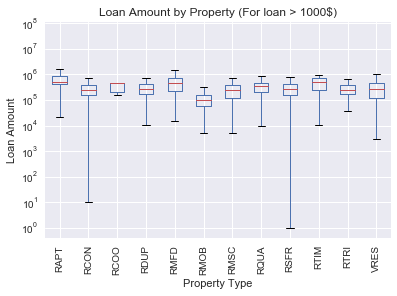

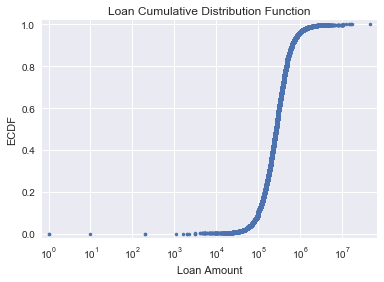

                loan_amount transaction_amount
                        sum                sum
property_type                                 
RAPT           7.493317e+08         3699986421
RCON           1.398446e+09         6076201871
RCOO           5.754200e+06            9369248
RDUP           4.921529e+08         1510902299
RMFD           4.747075e+08         1685002096
RMOB           3.465458e+07          198792278
RMSC           1.135328e+08          464514509
RQUA           1.715183e+08          514267246
RSFR           1.349036e+10        46490592081
RTIM           9.825920e+05            1640875
RTRI           9.824460e+07          331895727
VRES           3.248376e+08         2690296884


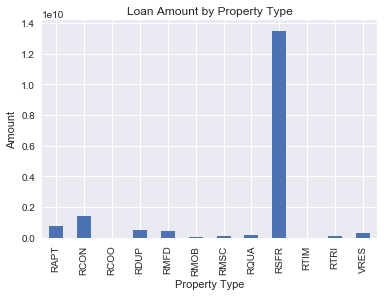

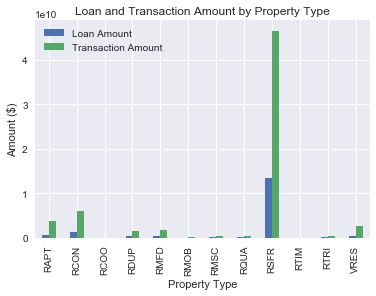

                loan_amount transaction_amount loan percent transaction percent
                        sum                sum                                 
property_type                                                                  
RAPT           7.493317e+08         3699986421     4.317788            5.810877
RCON           1.398446e+09         6076201871     8.058107            9.542754
RCOO           5.754200e+06            9369248     0.033157            0.014715
RDUP           4.921529e+08         1510902299     2.835876            2.372892
RMFD           4.747075e+08         1685002096     2.735352            2.646318
RMOB           3.465458e+07          198792278     0.199686            0.312206
RMSC           1.135328e+08          464514509     0.654197            0.729526
RQUA           1.715183e+08          514267246     0.988320            0.807663
RSFR           1.349036e+10        46490592081    77.733977           73.014080
RTIM           9.825920e+05            1

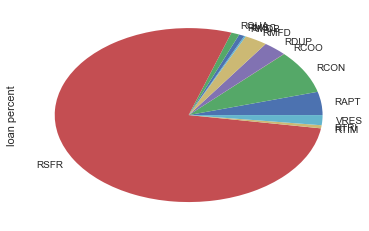

In [4]:
# Initial Data Wrangling

## In previous section we observed some columns which need some modifications

# Sort Data based on 'transaction_date' column 

df['transaction_date'] =  pd.to_datetime(df['transaction_date'], format='%Y/%m/%d')
df = df.sort_values('transaction_date')
df = df.reset_index(drop=True)

# Replace missing value with NaN

df['year_built'].replace(to_replace=0, value=np.NaN, inplace=True)
df['sqft'].replace(to_replace=0, value=np.NaN, inplace=True)
df['lender'].replace(to_replace='* Undisclosed', value=np.NaN, inplace=True)

# Re-Checking Clean Data

print (df.info())
print (df.head())
print (df.describe())

# Initial data exploration on all cleaned data 

df.boxplot(column = 'sqft' , by='property_type' , rot=90)
plt.xlabel('Property Type')
plt.ylabel('Property Area (sqft)')
plt.title('Property Area by Property Type')
plt.yscale("log")
plt.suptitle("")
plt.show()


df.boxplot(column = 'year_built' , by='property_type' , rot=90)
plt.xlabel('Property Type')
plt.ylabel('Year Built')
plt.title('Year Built by Property Area')
plt.suptitle("")
plt.show()

# For getting the better image of loans I filtered the loans = 1000 

df_loan_non_zero = df.loc[df['loan_amount'] > 0 , ] 
df_loan_non_zero.boxplot(column='loan_amount' , by='property_type' , rot=90)
plt.xlabel("Property Type")
plt.ylabel("Loan Amount")
plt.title("Loan Amount by Property (For loan > 1000$)")
plt.yscale("log")
plt.suptitle("")
plt.show()

# Empirical Cumulative Distribution Function on All Loans 

x = np.sort(df_loan_non_zero['loan_amount'])
y = np.arange(1, len(x)+1) /len(x) 
plt.plot(x , y, marker='.' , linestyle='none')
plt.xscale("log")
plt.ylabel('ECDF')
plt.xlabel('Loan Amount')
plt.margins(0.02)
plt.title('Loan Cumulative Distribution Function')
plt.show()

# Total Loan Amount and Transaction Amount by Property Type

df_group_prtype = df.groupby('property_type')['loan_amount','transaction_amount'].agg(['sum'])
print (df_group_prtype)

df_group_prtype['loan_amount']['sum'].plot(kind='bar')
plt.xlabel('Property Type')
plt.ylabel('Amount')
plt.title('Loan Amount by Property Type')
plt.show()


df_group_prtype.plot(y=["loan_amount", "transaction_amount"], kind="bar")
plt.xlabel('Property Type')
plt.ylabel('Amount ($)')
plt.title('Loan and Transaction Amount by Property Type')
plt.legend(['Loan Amount', 'Transaction Amount'])
plt.show()


df_group_prtype['loan percent'] = df_group_prtype['loan_amount']['sum'] * 100 / df_group_prtype['loan_amount']['sum'].sum()
df_group_prtype['transaction percent'] = df_group_prtype['transaction_amount']['sum'] * 100 / df_group_prtype['transaction_amount']['sum'].sum()
print (df_group_prtype)


df_group_prtype['loan percent'].plot(kind='pie')
plt.show()

        property_id  transaction_amount   loan_amount   year_built         sqft
count  7.720000e+02        7.720000e+02  7.720000e+02   758.000000   764.000000
mean   3.525544e+07        3.805686e+05  3.274051e+05  1961.225594  1587.281414
std    1.938015e+07        2.961087e+05  2.263729e+05    23.067428   664.584621
min    2.366863e+07        0.000000e+00  5.000000e+04  1888.000000   528.000000
25%    2.627697e+07        1.937500e+05  1.762000e+05  1950.000000  1142.000000
50%    2.933817e+07        3.080000e+05  2.782500e+05  1960.000000  1422.000000
75%    3.288429e+07        4.725568e+05  4.200000e+05  1977.000000  1804.000000
max    1.405366e+08        3.450182e+06  2.087700e+06  2016.000000  5211.000000


/Users/rtmac/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


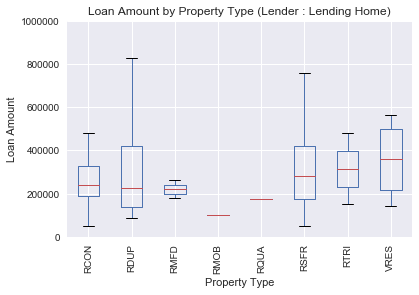

               loan_amount                      transaction_amount                      loan_amount(%) loan_count(%)
                       sum           mean count                sum           mean count                             
property_type                                                                                                       
RCON            14244700.0  309667.391304    46           16040600  348708.695652    46       5.958549      5.635735
RDUP             4127800.0  317523.076923    13            4769490  366883.846154    13       1.683938      1.633112
RMFD              442500.0  221250.000000     2             496000  248000.000000     2       0.259067      0.175070
RMOB              101000.0  101000.000000     1             100000  100000.000000     1       0.129534      0.039959
RQUA              175000.0  175000.000000     1             150000  150000.000000     1       0.129534      0.069237
RSFR           231610834.0  329460.645804   703          2696713

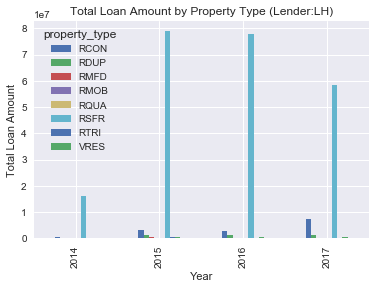

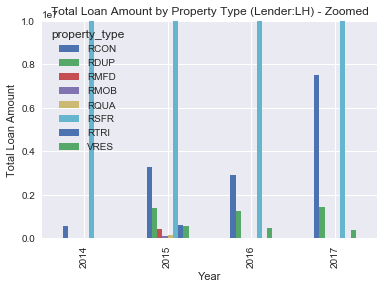

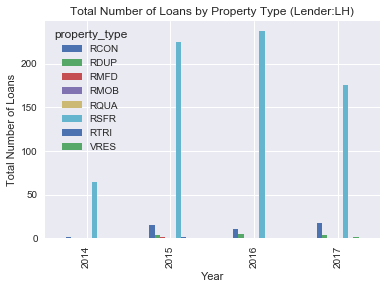

                                    count        sum
transaction_date property_type                      
2014             RCON            2.985075   3.353096
                 RSFR           97.014925  96.646904
2015             RCON            5.976096   3.836447
                 RDUP            1.593625   1.642404
                 RMFD            0.796813   0.517491
                 RMOB            0.398406   0.118116
                 RQUA            0.398406   0.204657
                 RSFR           89.641434  92.287110
                 RTRI            0.796813   0.735948
                 VRES            0.398406   0.657827
2016             RCON            4.330709   3.513310
                 RDUP            1.968504   1.549833
                 RSFR           93.307087  94.355912
                 VRES            0.393701   0.580945
2017             RCON            9.000000  11.045548
                 RDUP            2.000000   2.127769
                 RSFR           88.000000  86.

In [5]:
## Deep dive into "Lending Home" borrowers 

# Filter LendingHome as lender from whole dataset 

LH_bor = df[df['lender']== 'LendingHome']
print (LH_bor.describe())


# Initial exploration on LH borrowers 

LH_bor.boxplot(column=['loan_amount'], by=['property_type'] , rot = 90)
plt.title("Loan Amount by Property Type (Lender : Lending Home)")
plt.suptitle("")
plt.xlabel("Property Type")
plt.ylabel("Loan Amount")
plt.ylim([0,1000000])
plt.show()

# LH borrowers grouped by Property Type and check some features 

LH_bor_prtype = LH_bor.groupby('property_type')['loan_amount','transaction_amount'].agg(['sum','mean','count'])
LH_bor_prtype['loan_amount(%)'] = LH_bor_prtype ['loan_amount']['count'] * 100 / LH_bor_prtype ['loan_amount']['count'].sum()
LH_bor_prtype['loan_count(%)'] = LH_bor_prtype ['loan_amount']['sum'] * 100 / LH_bor_prtype ['loan_amount']['sum'].sum()
print (LH_bor_prtype)

# Check the Lending Home growth through time 

# Loans by Lending Home grouped by Time(year) and Property Type

LH_bor_prtype_year = LH_bor.groupby([df.transaction_date.dt.year, df.property_type])['loan_amount'].agg(['count','sum'])
print (LH_bor_prtype_year)

# Plot Lednging Home Loans (Amount)

LH_bor_prtype_year.unstack(level=1).plot(kind='bar' , y='sum' ,subplots=False)
plt.xlabel('Year')
plt.ylabel('Total Loan Amount')
plt.title('Total Loan Amount by Property Type (Lender:LH)')
plt.show()

# Change "ylim" to zoom into the above chart to get better idea of other property types (all except:RSFR)

LH_bor_prtype_year.unstack(level=1).plot(kind='bar' , y='sum' ,subplots=False)
plt.xlabel('Year')
plt.ylabel('Total Loan Amount')
plt.title('Total Loan Amount by Property Type (Lender:LH) - Zoomed')
plt.ylim(0,10000000)
plt.show()

# Plot Lending Home loans (Counts)

LH_bor_prtype_year.unstack(level=1).plot(kind='bar' , y='count' ,subplots=False)
plt.xlabel('Year')
plt.ylabel('Total Number of Loans')
plt.title('Total Number of Loans by Property Type (Lender:LH)')
plt.show()


# Lending Home borrowers (percent) based on property type in each year
LH_bor_prtype_year_percent = LH_bor_prtype_year.groupby(level=0).apply(lambda x:100 * x / (x.sum()))
print (LH_bor_prtype_year_percent)






        property_id  transaction_amount   loan_amount    year_built           sqft
count  4.841000e+04        4.841000e+04  4.841000e+04  46089.000000   46897.000000
mean   4.106424e+07        5.263316e+05  3.532694e+05   1964.375903    1960.090134
std    2.934825e+07        1.700070e+06  4.870800e+05     26.727539    3083.990960
min    2.349861e+07        0.000000e+00  1.000000e+00   1801.000000       1.000000
25%    2.705576e+07        1.940000e+05  1.610000e+05   1949.000000    1196.000000
50%    3.104727e+07        3.150000e+05  2.625000e+05   1962.000000    1552.000000
75%    3.834847e+07        5.200000e+05  4.160000e+05   1984.000000    2121.000000
max    1.846802e+08        1.500000e+08  4.649990e+07   2017.000000  191136.000000


/Users/rtmac/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)
/Users/rtmac/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3245: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '


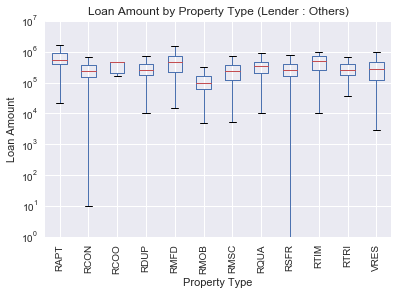

                loan_amount                       transaction_amount                      loan_amount(%)  \
                        sum           mean  count                sum          mean  count                  
property_type                                                                                              
RAPT           7.493317e+08  859325.365826    872         2761388703  3.166730e+06    872       1.801281   
RCON           1.384202e+09  307054.472493   4508         2247626995  4.985863e+05   4508       9.312126   
RCOO           5.754200e+06  383613.333333     15            6090500  4.060333e+05     15       0.030985   
RDUP           4.880251e+08  331764.207342   1471          643351492  4.373566e+05   1471       3.038628   
RMFD           4.742650e+08  672716.270922    705         1197406336  1.698449e+06    705       1.456311   
RMOB           3.455358e+07  121240.624561    285           40469400  1.419979e+05    285       0.588721   
RMSC           1.135328e+08 

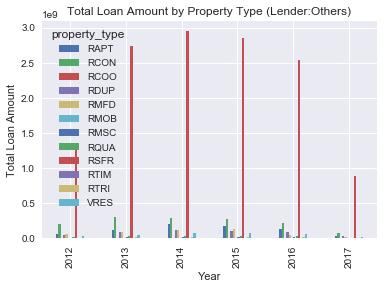

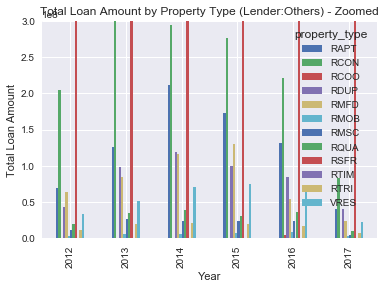

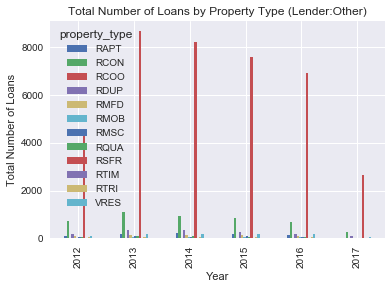

                                    count        sum
transaction_date property_type                      
2012             RAPT            1.624365   3.906372
                 RCON           12.013536  11.631722
                 RDUP            3.367174   2.496359
                 RMFD            2.030457   3.628288
                 RMOB            0.507614   0.172861
                 RMSC            0.829103   0.642042
                 RQUA            1.150592   1.138899
                 RSFR           75.617597  73.811099
                 RTRI            0.964467   0.686605
                 VRES            1.895093   1.885752
2013             RAPT            1.612165   3.603421
                 RCON            9.956948   8.726840
                 RDUP            3.334249   2.817717
                 RMFD            1.227443   2.444329
                 RMOB            0.458001   0.173013
                 RMSC            0.916003   0.750231
                 RQUA            1.007603   1.

In [11]:
# Other Lenders 

OTH_bor = df[df['lender'] != 'LendingHome']
OTH_bor_non_zero = OTH_bor[OTH_bor['loan_amount'] > 0]
print (OTH_bor_non_zero.describe())

pd.set_option('display.width', 115)

# Initial exploration on LH borrowers 

OTH_bor_non_zero.boxplot(column=['loan_amount'], by=['property_type'] , rot = 90)
plt.title("Loan Amount by Property Type (Lender : Others)")
plt.suptitle("")
plt.xlabel("Property Type")
plt.ylabel("Loan Amount")
plt.yscale('log')
plt.ylim([0,10000000])
plt.show()

# Others borrowers grouped by Property Type and check some features 

OTH_bor_prtype = OTH_bor_non_zero.groupby('property_type')['loan_amount','transaction_amount'].agg(['sum','mean','count'])
OTH_bor_prtype['loan_amount(%)'] = OTH_bor_prtype ['loan_amount']['count'] * 100 / OTH_bor_prtype ['loan_amount']['count'].sum()
OTH_bor_prtype['loan_count(%)'] = OTH_bor_prtype ['loan_amount']['sum'] * 100 / OTH_bor_prtype ['loan_amount']['sum'].sum()

print (OTH_bor_prtype)



# Check other lenders growth through time 

# Loans by other lenders grouped by Time(year) and Property Type

OTH_bor_prtype_year = OTH_bor_non_zero.groupby([df.transaction_date.dt.year, df.property_type])['loan_amount'].agg(['count','sum'])
print (OTH_bor_prtype_year)

# Plot Other Lenders Loans (Amount)

OTH_bor_prtype_year.unstack(level=1).plot(kind='bar' , y='sum' ,subplots=False)
plt.xlabel('Year')
plt.ylabel('Total Loan Amount')
plt.title('Total Loan Amount by Property Type (Lender:Others)')
plt.show()

# Change "ylim" to zoom into the above chart to get better idea of other property types (all except:RSFR)

OTH_bor_prtype_year.unstack(level=1).plot(kind='bar' , y='sum' ,subplots=False)
plt.xlabel('Year')
plt.ylabel('Total Loan Amount')
plt.title('Total Loan Amount by Property Type (Lender:Others) - Zoomed')
plt.ylim(0,300000000)
plt.show()

# Plot Other lenders loans (Counts)

OTH_bor_prtype_year.unstack(level=1).plot(kind='bar' , y='count' ,subplots=False)
plt.xlabel('Year')
plt.ylabel('Total Number of Loans')
plt.title('Total Number of Loans by Property Type (Lender:Other)')
plt.show()


# Othet lenders' borrowers (percent) based on property type in each year
OTH_bor_prtype_year_percent = OTH_bor_prtype_year.groupby(level=0).apply(lambda x:100 * x / (x.sum()))
print (OTH_bor_prtype_year_percent)





                                        sum  count          mean
transaction_date property_type                                  
2012             RAPT             242972086    222  1.094469e+06
                 RCON            1159344960   2715  4.270147e+05
                 RCOO                494500      4  1.236250e+05
                 RDUP             188303921    688  2.736976e+05
                 RMFD             243712718    254  9.594989e+05
                 RMOB              16398180    218  7.522101e+04
                 RMSC              59764440    207  2.887171e+05
                 RQUA              72392712    216  3.351514e+05
                 RSFR            5478881792  16963  3.229901e+05
                 RTRI              50610777    175  2.892044e+05
                 VRES             205541001    540  3.806315e+05
2013             RAPT             650747499    367  1.773154e+06
                 RCON            1409670624   4743  2.972108e+05
                 RCOO    

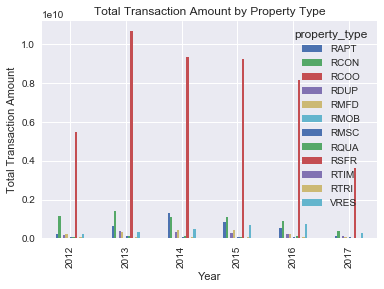

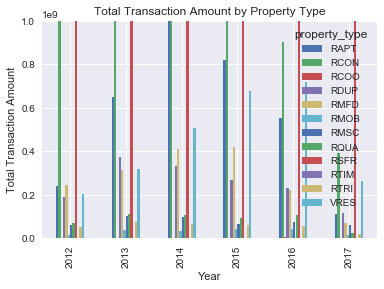

In [15]:
# Transaction Amount grouped by Property Type and Time 

trans_amount_prtype_year = df.groupby([df.transaction_date.dt.year , df.property_type])['transaction_amount'].agg(['sum','count','mean'])
print (trans_amount_prtype_year)

# plot transaction amount growth through time 
trans_amount_prtype_year.unstack(level=1).plot(kind='bar' , y='sum' ,subplots=False)
plt.xlabel('Year')
plt.ylabel('Total Transaction Amount')
plt.title('Total Transaction Amount by Property Type')
plt.show()

# set ylim to zoomed in to the graph 
trans_amount_prtype_year.unstack(level=1).plot(kind='bar' , y='sum' ,subplots=False)
plt.xlabel('Year')
plt.ylabel('Total Transaction Amount')
plt.title('Total Transaction Amount by Property Type')
plt.ylim([0,1000000000])
plt.show()

                                   sum  count
lender                                       
Anchor                     899300912.0   2439
Wells Fargo                669295340.6   1394
Lone Oak                   358406300.0   1201
Chase                      325807265.0    444
5 Arch                     255800696.0    716
LendingHome                252756734.0    772
Genesis                    232168809.0    385
FIRST REPUBLIC BK          185743611.0    147
FIRST REPUBLIC BANK        169419297.0    178
CASON HM LNS               146737275.0    388
Pivotal                    127142850.0    390
Center Street              124816150.0    461
BANK OF AMERICA            113651682.0    211
UNION BANK                 110817264.0    159
CASCADE LAND HM FINANCING  109303279.0    313
MUFG UNION BK NA           103683472.0    141
FATHER KRAMER CU            95967891.0    274
Iron Bridge                 93794800.0    204
ARCHETYPE CREDIT OPPORTUN   82027600.0    124
REHABBERS FINANCIAL INC     767441

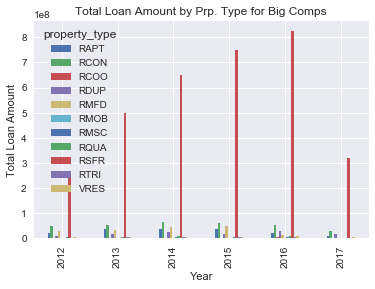

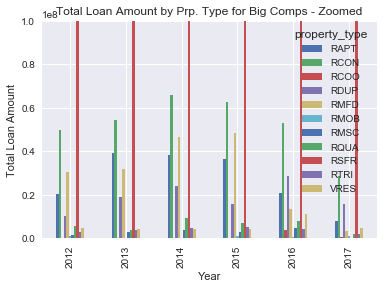

                                Loan Percent
transaction_date property_type              
2012             RAPT               5.302108
                 RCON              12.812130
                 RDUP               2.648978
                 RMFD               7.840845
                 RMOB               0.245815
                 RMSC               0.428328
                 RQUA               1.441314
                 RSFR              67.379644
                 RTRI               0.710920
                 VRES               1.189917
2013             RAPT               5.959671
                 RCON               8.312654
                 RDUP               2.894351
                 RMFD               4.836096
                 RMOB               0.012270
                 RMSC               0.447747
                 RQUA               0.602892
                 RSFR              75.683150
                 RTRI               0.592247
                 VRES               0.658921
2014      

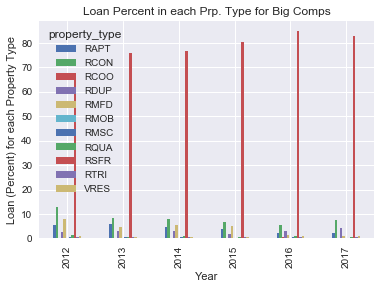

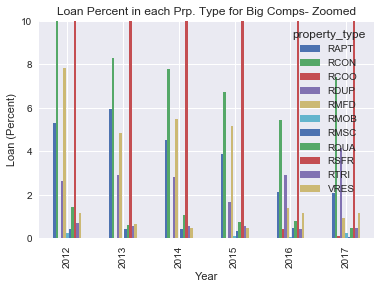

In [64]:
# Big competitors in Lending Industry 

# All lenders grouped by loans (sum and count)

all_busin_names = df.groupby('lender')['loan_amount'].agg(['sum','count'])

# Sort lenders for finding the biggest ones 

sorted_all_busin = all_busin_names.sort_values(by='sum' , ascending = False ).drop('* OTHER INSTITUTIONAL LEN')
print (sorted_all_busin)

# Filter the ones with loan amounts > 10e8 and put them in a list 

big_busin = all_busin_names[all_busin_names['sum'] > 100000000].sort_values(by='sum' , ascending = False).drop('* OTHER INSTITUTIONAL LEN')
big_busin_names = list(big_busin.index.values)
print (big_busin_names)

# Extract the observations related to the big business 

df_big_busin = df[df['lender'].isin(big_busin_names)]
print (df_big_busin.head(15))

# Group big business by property type 

df_big_busin_prtype_year = df_big_busin.groupby([df_big_busin.transaction_date.dt.year , df_big_busin.property_type])['loan_amount'].agg(['sum'])
print (df_big_busin_prtype_year)

# Visulaization 

df_big_busin_prtype_year.unstack(level=1).plot(kind='bar' , y='sum' ,subplots=False)
plt.xlabel('Year')
plt.ylabel('Total Loan Amount')
plt.title('Total Loan Amount by Prp. Type for Big Comps')
plt.show()

# Zoomed in plot 
df_big_busin_prtype_year.unstack(level=1).plot(kind='bar' , y='sum' ,subplots=False)
plt.xlabel('Year')
plt.ylabel('Total Loan Amount')
plt.title('Total Loan Amount by Prp. Type for Big Comps - Zoomed')
plt.ylim([0,100000000])
plt.show()

# Getting the loan percent for each property type 
df_big_busin_prtype_year_percent = df_big_busin_prtype_year.groupby(level=0).apply(lambda x:100 * x / (x.sum()))
df_big_busin_prtype_year_percent.columns = ['Loan Percent']
print (df_big_busin_prtype_year_percent)

df_big_busin_prtype_year_percent.unstack(level=1).plot(kind='bar' , y='Loan Percent' , subplots= False)
plt.xlabel('Year')
plt.ylabel('Loan (Percent) for each Property Type')
plt.title('Loan Percent in each Prp. Type for Big Comps')
plt.show()

# Zoomed in plot
df_big_busin_prtype_year_percent.unstack(level=1).plot(kind='bar' , y='Loan Percent' , subplots= False)
plt.xlabel('Year')
plt.ylabel('Loan (Percent)')
plt.title('Loan Percent in each Prp. Type for Big Comps- Zoomed')
plt.ylim([0,10])
plt.show()